In [1]:
from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#load data
#tr_data = pd.read_table("training_data", sep='\t', encoding='utf-8', engine='python')
tr_data = pd.read_table("fin_shuf_c_nc", sep='\t', encoding='utf-8', engine='python')
tr_data = tr_data.drop(['#ID'], axis=1)
ts_hum_data = pd.read_table("shuf_tot_human", sep='\t', encoding='utf-8', engine='python')
ts_hum_data = ts_hum_data.drop(['#ID'], axis=1)
ts_zebrafish_data = pd.read_table("shuf_tot_zebrafish", sep='\t', encoding='utf-8', engine='python')
ts_zebrafish_data = ts_zebrafish_data.drop(['#ID'], axis=1)
ts_mouse_data = pd.read_table("shuf_tot_mouse", sep='\t', encoding='utf-8', engine='python')
ts_mouse_data = ts_mouse_data.drop(['#ID'], axis=1)
ts_gen_data = pd.read_table("fin_shuf_gen", sep='\t', encoding='utf-8', engine='python')
ts_gen_data = ts_gen_data.drop(['#ID'], axis=1)
ts_mouse_gen_data = pd.read_table("total_v18_mouse_feat", sep='\t', encoding='utf-8', engine='python')
ts_mouse_gen_data = ts_mouse_gen_data.drop(['#ID'], axis=1)

In [3]:
tr_model = pd.get_dummies(tr_data)
ts_hum_model = pd.get_dummies(ts_hum_data)
ts_mouse_model = pd.get_dummies(ts_mouse_data)
ts_zebrafish_model = pd.get_dummies(ts_zebrafish_data)
ts_gen_model = pd.get_dummies(ts_gen_data)
ts_mouse_gen_model = pd.get_dummies(ts_mouse_gen_data)

In [4]:
#features = ['transcript_length', 'Fickett_score', 'ORF_coverage', 'ORF_integrity', 'GC1', 'GC2', 'GC3', 'stop_codon_num', 'instability', 'gravy', 'pI', 'Mw', 'PW']
prot_feat = ['instability', 'gravy', 'Mw', 'pI', 'PW', 'peptide_length']
rna_feat = ['ORF_coverage', 'ORF_integrity', 'GC1', 'GC2', 'GC3']
dna_feat = ['transcript_length', 'stop_codon_num', 'Fickett_score']

#features = ['transcript_length', 'Fickett_score', 'pI', 'ORF_integrity']
label = ['#label_noncoding']
y_train = tr_model[label]

x_prot_train = tr_model[prot_feat]
x_rna_train = tr_model[rna_feat]
x_dna_train = tr_model[dna_feat]

final_feats = []

f_test = ['transcript_length', 'Fickett_score', 'ORF_coverage', 'ORF_integrity', 'GC1', 'GC2', 'GC3', 'stop_codon_num', 'instability', 'gravy', 'pI', 'Mw', 'PW']
l_test = ['#label_noncoding']

In [5]:
model = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=10, min_child_weight=0, gamma=0.1, subsample=0.9, 
                      colsample_bytree=0.6, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [6]:
fin_fin_feats = ['gravy', 'Mw', 'pI', 'GC3', 'Fickett_score']

In [7]:
x_train = tr_model[fin_fin_feats]

x_hum_test = ts_hum_model[fin_fin_feats]
y_hum_test = ts_hum_model[l_test]

x_mouse_test = ts_mouse_model[fin_fin_feats]
y_mouse_test = ts_mouse_model[l_test]

x_zebrafish_test = ts_zebrafish_model[fin_fin_feats]
y_zebrafish_test = ts_zebrafish_model[l_test]

x_gen_test = ts_gen_model[fin_fin_feats]
y_gen_test = ts_gen_model[l_test]

x_mouse_gen_test = ts_mouse_gen_model[fin_fin_feats]
y_mouse_gen_test = ts_mouse_gen_model[l_test]

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(x_train)
#KFold(n_splits=2, random_state=None, shuffle=False)
cnt = 0
for train_index, test_index in kf.split(x_train):
    cnt += 1
    #print("TRAIN:", train_index, "TEST:", test_index)
    xx_train, xx_test = x_train.iloc[train_index], x_train.iloc[test_index]
    yy_train, yy_test = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(xx_train, yy_train)
    yy_pred = model.predict(xx_test)
    accuracy = accuracy_score(yy_test, yy_pred)
    print("Fold : %d"%cnt)
    print("Accuracy: %.2f%%"%(accuracy * 100.0))

/home/thesis/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thesis/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold : 1
Accuracy: 95.68%
Fold : 2
Accuracy: 95.92%
Fold : 3
Accuracy: 96.03%
Fold : 4
Accuracy: 96.27%
Fold : 5
Accuracy: 96.24%
Fold : 6
Accuracy: 95.96%
Fold : 7
Accuracy: 96.34%
Fold : 8
Accuracy: 96.41%
Fold : 9
Accuracy: 96.34%
Fold : 10
Accuracy: 95.88%


In [10]:
y_hum_pred = model.predict(x_hum_test)
y_mouse_pred = model.predict(x_mouse_test)
y_zebrafish_pred = model.predict(x_zebrafish_test)
y_gen_pred = model.predict(x_gen_test)
y_mouse_gen_pred = model.predict(x_mouse_gen_test)

In [11]:
accuracy = accuracy_score(y_hum_test, y_hum_pred)
print("Accuracy human: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_mouse_test, y_mouse_pred)
print("Accuracy mouse: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_zebrafish_test, y_zebrafish_pred)
print("Accuracy zebrafish: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_gen_test, y_gen_pred)
print("Accuracy gen: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(y_mouse_gen_test, y_mouse_gen_pred)
print("Accuracy mouse gen: %.2f%%" % (accuracy * 100.0))

Accuracy human: 97.00%
Accuracy mouse: 90.22%
Accuracy zebrafish: 86.59%
Accuracy gen: 89.04%
Accuracy mouse gen: 89.18%


In [ ]:
Accuracy human: 97.00%
Accuracy mouse: 90.22%
Accuracy zebrafish: 86.59%
Accuracy gen: 89.04%
Accuracy mouse gen: 89.18%

#gamma = 3
Accuracy human: 96.34%
Accuracy mouse: 90.56%
Accuracy zebrafish: 86.82%
Accuracy gen: 88.70%
Accuracy mouse gen: 89.25%

#gamma=4
Accuracy human: 96.26%
Accuracy mouse: 90.44%
Accuracy zebrafish: 86.73%
Accuracy gen: 88.77%
Accuracy mouse gen: 89.32%

In [12]:
from sklearn.metrics import classification_report

target_names = ['class non coding', 'class coding']
print(classification_report(y_hum_test, y_hum_pred, target_names=target_names))

#target_names = ['class non coding', 'class coding']
print(classification_report(y_mouse_test, y_mouse_pred, target_names=target_names))

#target_names = ['class non coding', 'class coding']
print(classification_report(y_zebrafish_test, y_zebrafish_pred, target_names=target_names))

print(classification_report(y_gen_test, y_gen_pred, target_names=target_names))

print(classification_report(y_mouse_gen_test, y_mouse_gen_pred, target_names=target_names))

                  precision    recall  f1-score   support

class non coding       0.96      0.98      0.97      2500
    class coding       0.98      0.96      0.97      2500

       micro avg       0.97      0.97      0.97      5000
       macro avg       0.97      0.97      0.97      5000
    weighted avg       0.97      0.97      0.97      5000

                  precision    recall  f1-score   support

class non coding       0.91      0.90      0.90      1800
    class coding       0.90      0.91      0.90      1800

       micro avg       0.90      0.90      0.90      3600
       macro avg       0.90      0.90      0.90      3600
    weighted avg       0.90      0.90      0.90      3600

                  precision    recall  f1-score   support

class non coding       0.85      0.89      0.87      3991
    class coding       0.88      0.85      0.86      3991

       micro avg       0.87      0.87      0.87      7982
       macro avg       0.87      0.87      0.87      7982
    we

In [13]:
from sklearn.metrics import confusion_matrix
from __future__ import division
tn, fp, fn, tp = confusion_matrix(y_hum_test, y_hum_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)

tn, fp, fn, tp = confusion_matrix(y_mouse_test, y_mouse_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)

tn, fp, fn, tp = confusion_matrix(y_zebrafish_test, y_zebrafish_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)

tn, fp, fn, tp = confusion_matrix(y_gen_test, y_gen_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)

tn, fp, fn, tp = confusion_matrix(y_mouse_gen_test, y_mouse_gen_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.9792
0.8972222222222223
0.8862440491104986
0.8401658060210068
0.8643517222066648


In [14]:
from sklearn.metrics import confusion_matrix

cm_hum = confusion_matrix(y_hum_test, y_hum_pred)
print(cm_hum)
cm_mouse = confusion_matrix(y_mouse_test, y_mouse_pred)
print(cm_mouse)
cm_zebrafish = confusion_matrix(y_zebrafish_test, y_zebrafish_pred)
print(cm_zebrafish)
cm_gen = confusion_matrix(y_gen_test, y_gen_pred)
print(cm_gen)
cm_gen = confusion_matrix(y_mouse_gen_test, y_mouse_gen_pred)
print(cm_gen)

[[2448   52]
 [  98 2402]]
[[1615  185]
 [ 167 1633]]
[[3537  454]
 [ 616 3375]]
[[23917  4550]
 [ 1692 26775]]
[[15433  2422]
 [ 1442 16413]]


In [15]:
from sklearn.metrics import roc_auc_score

print roc_auc_score(y_hum_test, y_hum_pred)

print roc_auc_score(y_mouse_test, y_mouse_pred)

print roc_auc_score(y_zebrafish_test, y_zebrafish_pred)

print roc_auc_score(y_gen_test, y_gen_pred)

print roc_auc_score(y_mouse_gen_test, y_mouse_gen_pred)

0.97
0.9022222222222224
0.8659483838636933
0.8903642814486951
0.8917950154018481


<IPython.core.display.Javascript object>


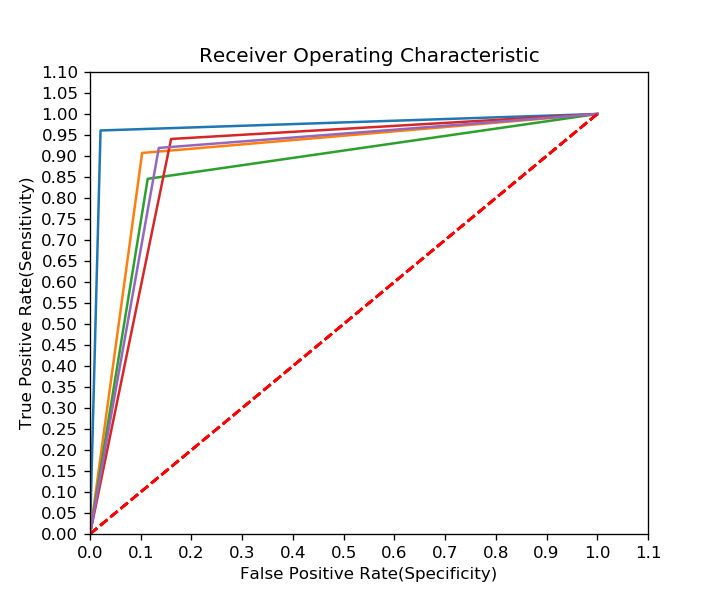

In [17]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_hum_test, y_hum_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [18]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_mouse_test, y_mouse_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [19]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_zebrafish_test, y_zebrafish_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [20]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_gen_test, y_gen_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()

In [21]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_mouse_gen_test, y_mouse_gen_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.yticks(np.arange(0.0, 1.2, step=0.05))
plt.xticks(np.arange(0.0, 1.2, step=0.1))
#print(lock, labels)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.autoscale(enable = False, axis = 'both', tight = True)
plt.rcParams['figure.figsize'] = [6, 5]
#print(plt.grid)
#plt.figure(figsize=(20, 10))
plt.show()